In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
# Load data
data = pd.read_csv('/Users/jakubsuszwedyk/Documents/University/Year_2/Project/Project_VSC_2/Project2-2/Project_2-2/NL_data/ams.csv')

In [8]:
# Convert 'time' to datetime and set as index
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)


In [9]:
# Run ADF test on the temperature data
result = adfuller(data['t2m'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] > 0.05:
    print("Series is non-stationary and may need differencing.")
else:
    print("Series is stationary.")

ADF Statistic: -12.276161
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Series is stationary.


In [10]:
# Run KPSS test on the temperature data
result_kpss = kpss(data['t2m'], regression='c')
print('\nKPSS Statistic: %f' % result_kpss[0])
print('p-value: %f' % result_kpss[1])
print('Critical Values:')
for key, value in result_kpss[3].items():
    print('\t%s: %.3f' % (key, value))

if result_kpss[1] < 0.05:
    print("Series is non-stationary based on KPSS test and may need differencing.")
else:
    print("Series is stationary based on KPSS test.")



KPSS Statistic: 0.523498
p-value: 0.036374
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is non-stationary based on KPSS test and may need differencing.


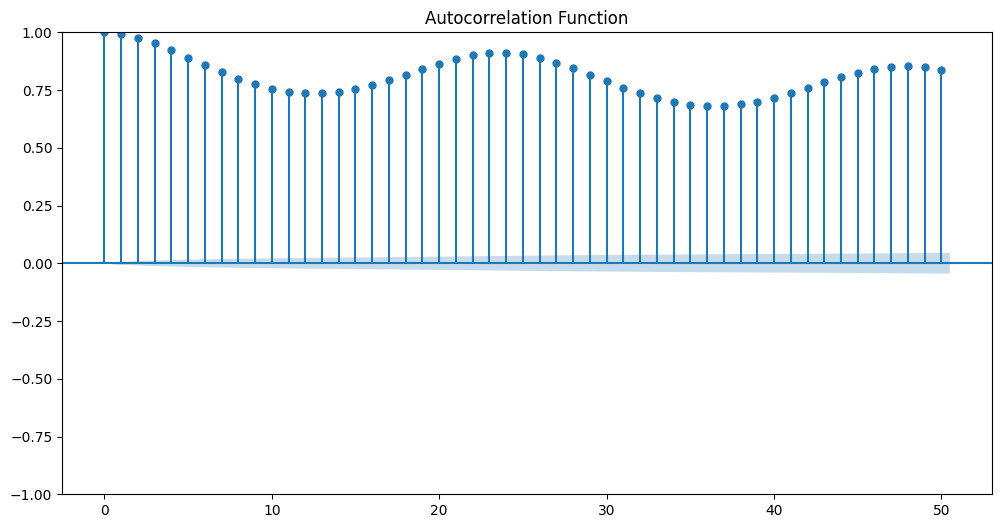

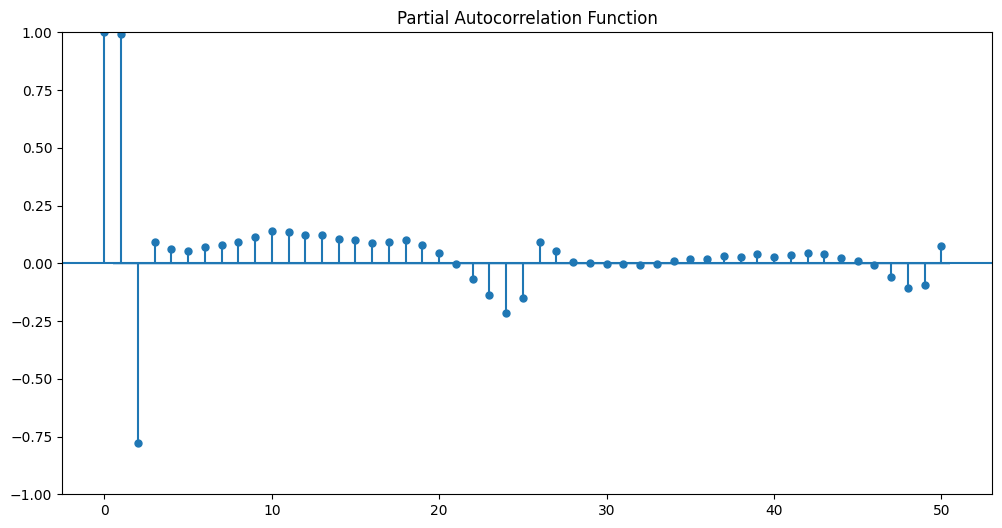

In [15]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(data['t2m'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['t2m'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function')
plt.show()

In [16]:
# Create lagged features based on past temperature values
window_size = 3
for i in range(1, window_size + 1):
    data[f't2m_lag_{i}'] = data['t2m'].shift(i)

# Drop rows with NaN values
data = data.dropna()

In [17]:
# Split data into features and target
X = data[[f't2m_lag_{i}' for i in range(1, window_size + 1)]]
y = data['t2m']

In [18]:
# Split data into training and testing sets, ensuring no shuffle for time series data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [19]:
# Create and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict on the test set
y_pred = model.predict(X_test)

In [21]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.21803753320311597


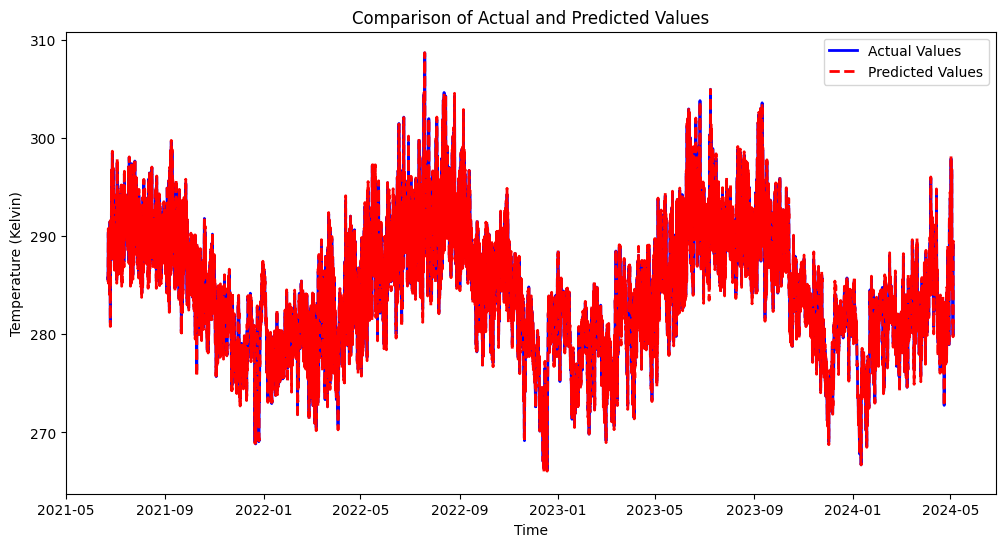

In [22]:
# Plotting Predicted vs Actual Values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, color='blue', label='Actual Values', linewidth=2)
plt.plot(y_test.index, y_pred, color='red', label='Predicted Values', linewidth=2, linestyle='--')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time')
plt.ylabel('Temperature (Kelvin)')
plt.legend()
plt.show()

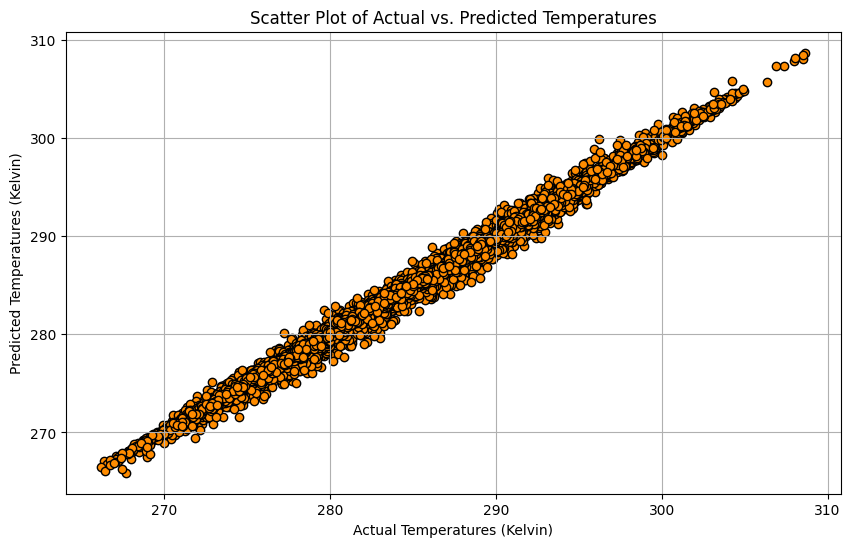

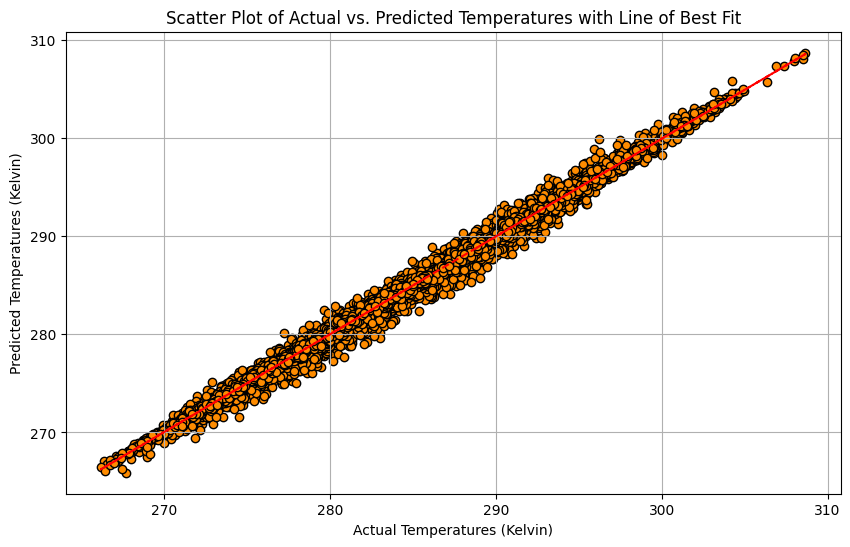

In [23]:
# Plotting Predicted vs Actual Values in a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='darkorange', edgecolors='k')
plt.title('Scatter Plot of Actual vs. Predicted Temperatures')
plt.xlabel('Actual Temperatures (Kelvin)')
plt.ylabel('Predicted Temperatures (Kelvin)')
plt.grid(True)
plt.show()

# Optional: Adding a line of best fit to the scatter plot to show the correlation
import numpy as np
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='darkorange', edgecolors='k')
# Adding a line of best fit
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r--")  # Red dashed line
plt.title('Scatter Plot of Actual vs. Predicted Temperatures with Line of Best Fit')
plt.xlabel('Actual Temperatures (Kelvin)')
plt.ylabel('Predicted Temperatures (Kelvin)')
plt.grid(True)
plt.show()
